In [6]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [7]:
x_src_path = '../Dataset/assignment1New.json'
y_src_path = '../DataBook/Assignment1_Data_Analyst.xlsx'

In [8]:
data = pd.read_json(x_src_path)


In [9]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [10]:
X = np.nan_to_num(data.values, nan=0, copy=True).astype(int)
y = plagiarised_array
np.isnan(X).any()

False

In [11]:
# imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
# X_imputed = imputer.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#seed 32 results 100% on test score

In [13]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 0.9090909090909091


In [14]:
predictions = p.predict(X_test)
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "Actual:", y_test[i])

Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0


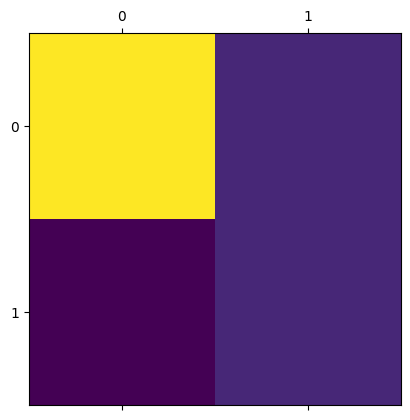

In [15]:
cm = confusion_matrix( p.predict(X_test), y_test)
# plt.set_cmap()
plt.matshow(cm)